In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline 
import matplotlib as mlp
import matplotlib.pyplot as plt
import os
import requests as req
import time as t
from datetime import datetime, date, time

In [86]:
from textblob import TextBlob

In [3]:
!pip install textblob

In [87]:
from textblob import TextBlob

# Uploading Source data to IBM cloud 

# * twitter_profile.csv - Contains social network features of users  (followers,	following)

# * twitter_text.csv - Contains social media post of users (text, date)

# * credit_history.csv - Contains credit history of different individuals with banks

In [129]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_a2366af92c13461a94447440c537010e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='kYlhWR-RIlnZgquOL9aEAzoODJmdJMvUWtl4MxVq9jEO',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_a2366af92c13461a94447440c537010e.get_object(Bucket='prophecyhackathonlti-donotdelete-pr-yv8mtkp1bitzgd',Key='twitter_profile.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

user_profile_df = pd.read_csv(body)
user_profile_df.head()
#df1.shape

,user,followers,following
0,PapaSaan,129,73
1,Higurashi2367,97,45
2,avidnessss,153,60
3,fannie_music,0,165
4,jarsofstars,67,67


In [89]:
body = client_a2366af92c13461a94447440c537010e.get_object(Bucket='prophecyhackathonlti-donotdelete-pr-yv8mtkp1bitzgd',Key='twitter_text.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

tweet_df= pd.read_csv(body)
tweet_df.head()

,user,text,date
0,YoungStew123,Wondering why gamebattles is down,Mon Apr 06 23:06:27 PDT 2009
1,sambg7777,@faithgg45 this computer doesn't have shockwa...,Mon Apr 06 23:11:56 PDT 2009
2,raciedo,it so tired that im crying for no reason at al...,Mon Apr 06 23:22:05 PDT 2009
3,Kegs1528,looks like i've missed out on yet another job ...,Mon Apr 06 23:42:34 PDT 2009
4,Kegs1528,I think I'm getting sick,Mon Apr 20 04:38:09 PDT 2009


In [90]:
body = client_a2366af92c13461a94447440c537010e.get_object(Bucket='prophecyhackathonlti-donotdelete-pr-yv8mtkp1bitzgd',Key='credit_history.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

credit_hist_df = pd.read_csv(body)
credit_hist_df.head()

,user,credit_record_status,job_yrs,home_type,loan_months,age,marital_status,job_type,debt,loan_amt,price_of_good
0,PapaSaan,GOOD,9,RENT,60,30,MARRIED,FREELANCE,0,800,846
1,Higurashi2367,GOOD,1,RENT,48,27,SINGLE,FIXED,0,850,1000
2,avidnessss,GOOD,15,OWNER,48,60,MARRIED,FIXED,0,450,1188
3,fannie_music,BAD,0,OWNER,60,42,MARRIED,FIXED,0,1300,1750
4,jarsofstars,GOOD,14,RENT,60,46,MARRIED,FREELANCE,0,1500,2250


# Calculating mean polarity of tweets using sentiment analysis

In [91]:
tweet_df['mean_polarity'] = tweet_df['text'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
tweet_df = tweet_df.groupby('user').agg({'mean_polarity':'mean'}).reset_index()

In [92]:
tweet_df.head()

,user,mean_polarity
0,05MustangGuy,0.0000
1,061490,0.0625
2,0bzeek,0.0000
3,0mnicide,0.0000
4,13moons,0.1000


# Creating final dataframe by merging social media & credit history data sources

In [93]:
twitter_df = pd.merge(user_profile_df, tweet_df, on='user')

In [94]:
tweet_credit_df= pd.merge(twitter_df,credit_hist_df, on='user')

In [95]:
tweet_credit_df.head()

,user,followers,following,mean_polarity,credit_record_status,job_yrs,home_type,loan_months,age,marital_status,job_type,debt,loan_amt,price_of_good
0,PapaSaan,129,73,-1.0,GOOD,9,RENT,60,30,MARRIED,FREELANCE,0,800,846
1,Higurashi2367,97,45,-1.0,GOOD,1,RENT,48,27,SINGLE,FIXED,0,850,1000
2,avidnessss,153,60,-1.0,GOOD,15,OWNER,48,60,MARRIED,FIXED,0,450,1188
3,fannie_music,0,165,-1.0,BAD,0,OWNER,60,42,MARRIED,FIXED,0,1300,1750
4,jarsofstars,67,67,-1.0,GOOD,14,RENT,60,46,MARRIED,FREELANCE,0,1500,2250


#  Exploratory data analysis

In [96]:
import seaborn as sns
from matplotlib import pyplot as plt

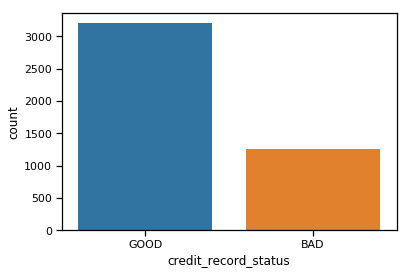

In [97]:
sns.countplot(tweet_credit_df["credit_record_status"])

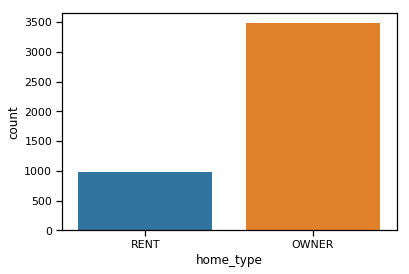

In [98]:
sns.countplot(tweet_credit_df["home_type"])

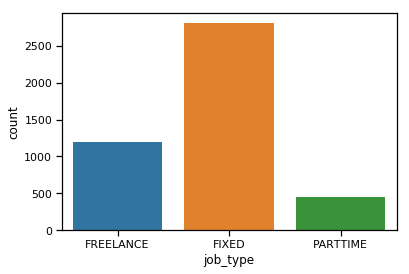

In [99]:
sns.countplot(tweet_credit_df["job_type"])

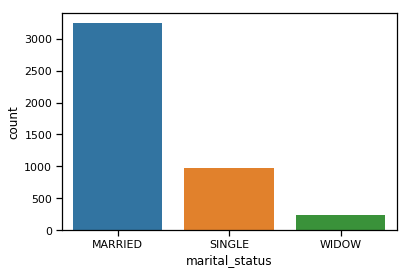

In [100]:
sns.countplot(tweet_credit_df["marital_status"])

In [18]:
!pip install regex

# Feature Encoding

In [101]:
import regex as re
tweet_credit_df["credit_record_status"] = tweet_credit_df["credit_record_status"].apply(lambda x: re.sub('GOOD','1',x))
tweet_credit_df["credit_record_status"] = tweet_credit_df["credit_record_status"].apply(lambda x: re.sub('BAD','0',x))
tweet_credit_df["credit_record_status"] = pd.to_numeric(tweet_credit_df["credit_record_status"])

In [102]:
"home_type"
tweet_credit_df["home_type"] = tweet_credit_df["home_type"].apply(lambda x: re.sub('OWNER','1',x))
tweet_credit_df["home_type"] = tweet_credit_df["home_type"].apply(lambda x: re.sub('RENT','0',x))
tweet_credit_df["home_type"] = pd.to_numeric(tweet_credit_df["home_type"])

In [103]:
"job_type"
tweet_credit_df["job_type"] = tweet_credit_df["job_type"].apply(lambda x: re.sub('FIXED','1',x))
tweet_credit_df["job_type"] = tweet_credit_df["job_type"].apply(lambda x: re.sub('PARTTIME','2',x))
tweet_credit_df["job_type"] = tweet_credit_df["job_type"].apply(lambda x: re.sub('FREELANCE','3',x))
tweet_credit_df["job_type"] = pd.to_numeric(tweet_credit_df["job_type"])

In [104]:
"marital_status"
tweet_credit_df["marital_status"] = tweet_credit_df["marital_status"].apply(lambda x: re.sub('MARRIED','1',x))
tweet_credit_df["marital_status"] = tweet_credit_df["marital_status"].apply(lambda x: re.sub('WIDOW','2',x))
tweet_credit_df["marital_status"] = tweet_credit_df["marital_status"].apply(lambda x: re.sub('SINGLE','3',x))
tweet_credit_df["marital_status"] = pd.to_numeric(tweet_credit_df["marital_status"])

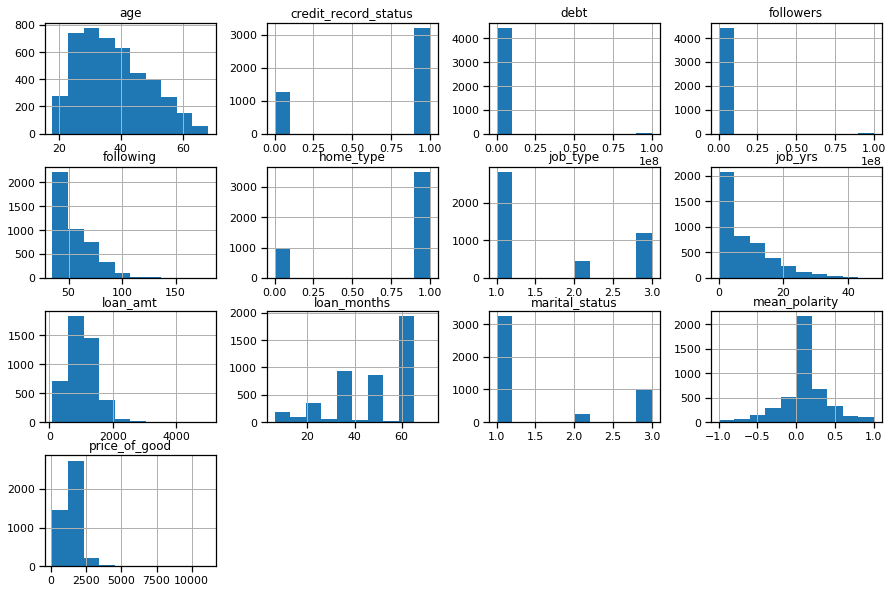

In [105]:
tweet_credit_df.hist(figsize = (15,10))
plt.show()

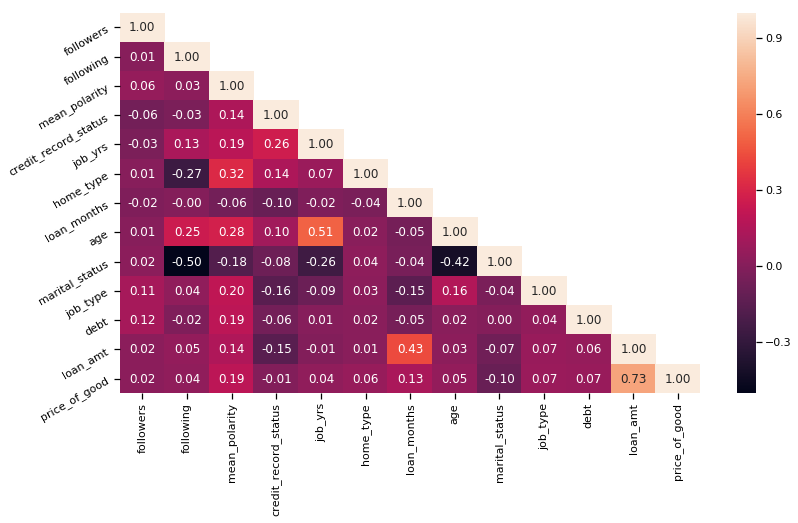

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = tweet_credit_df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


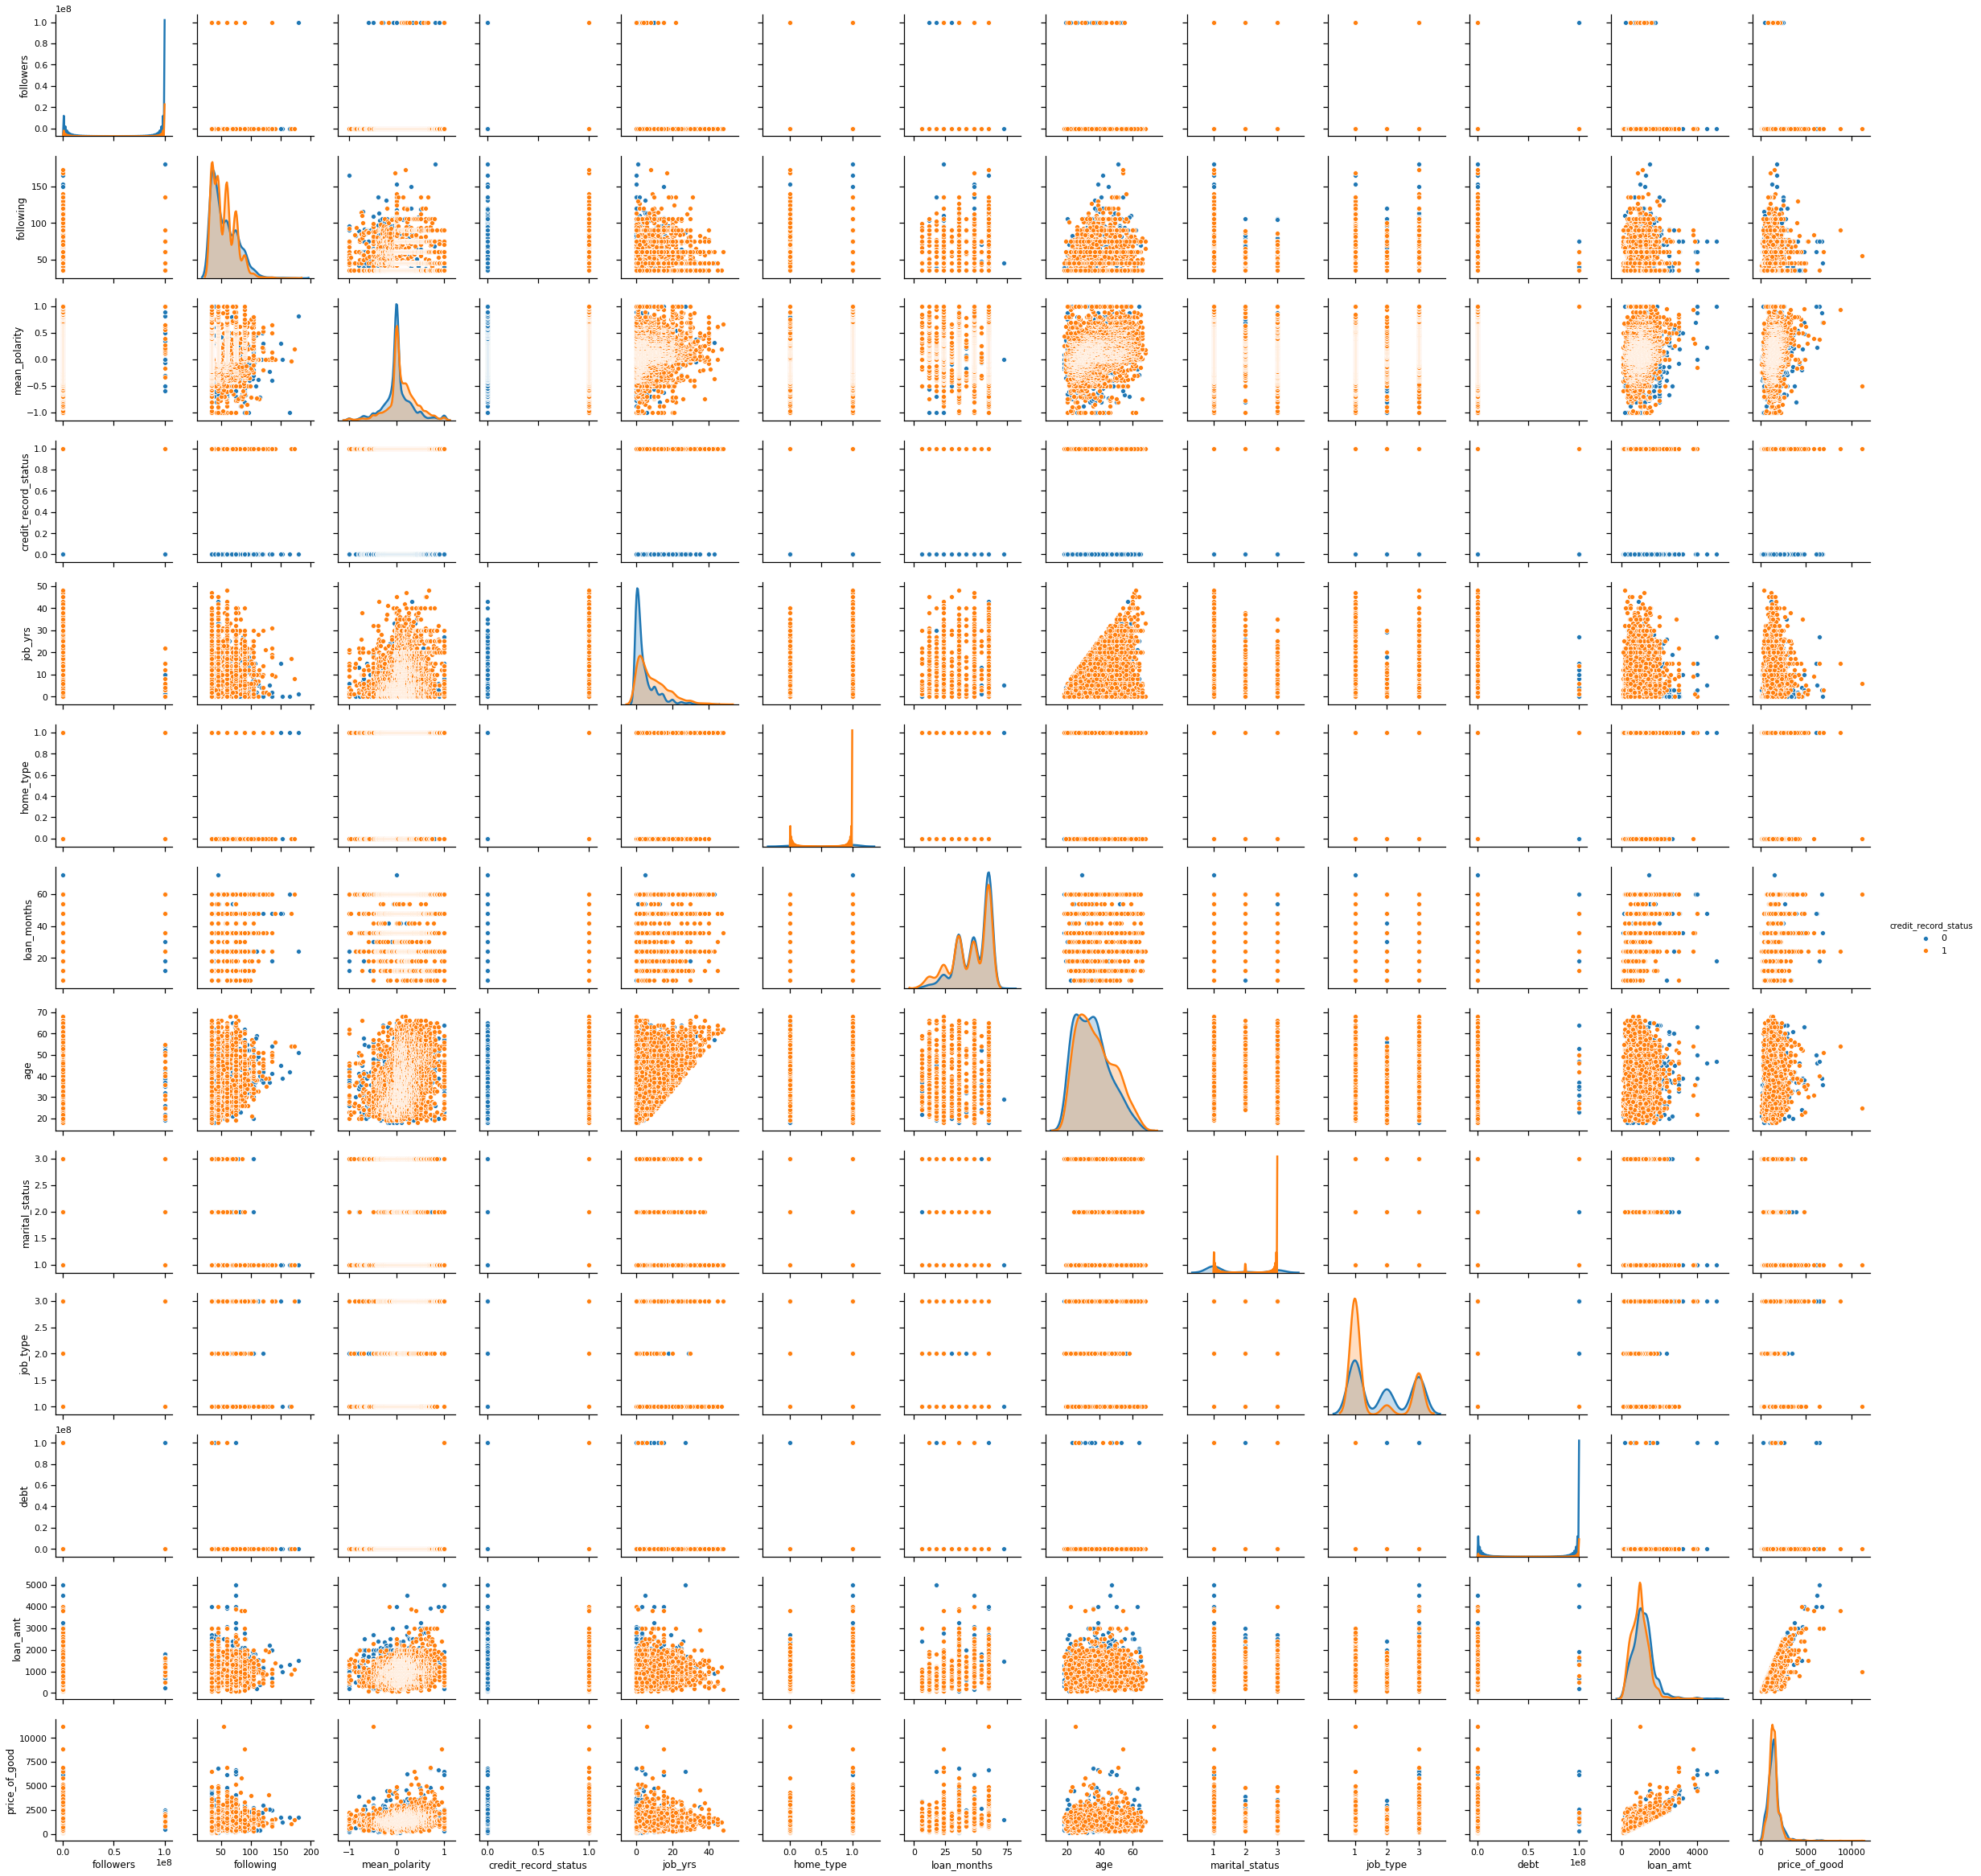

In [107]:
sns.pairplot(tweet_credit_df, diag_kind="kde", hue="credit_record_status")

In [109]:
tweet_credit_df.drop(['user'],axis=1,inplace=True)

# Train test split for model creation

In [110]:
from sklearn.model_selection import train_test_split
X= tweet_credit_df.drop("credit_record_status",1) 
Y = tweet_credit_df["credit_record_status"]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3)

# Defining function for calculating model performance

In [112]:
from sklearn.metrics import confusion_matrix, accuracy_score,roc_auc_score

# Function for calling performance measures

def generate_perf_measures(clf_mod, score_data, labels, print_prefix):
    pred_label = clf_mod.predict(score_data)
    pred_prob = clf_mod.predict_proba(score_data)
    print("\n")
    print(print_prefix,"Set Performance measures")
    print(print_prefix,"Accuracy",accuracy_score(labels,pred_label))
    print("\n",confusion_matrix(labels,pred_label))
    print("\n",print_prefix,"AUC",roc_auc_score(labels,pred_prob[:,1]))

# Evaluating different models

In [113]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
log_clf.fit(X_train,Y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [114]:
generate_perf_measures(log_clf,X_train,Y_train,"Training")
generate_perf_measures(log_clf,X_test,Y_test,"Test")



Training Set Performance measures
Training Accuracy 0.7312379730596537

 [[  80  777]
 [  61 2200]]

 Training AUC 0.7102066030612946


Test Set Performance measures
Test Accuracy 0.7090501121914734

 [[ 31 366]
 [ 23 917]]

 Test AUC 0.723203279918538


In [119]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=12,min_samples_split=85)

dt_clf.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=85,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [120]:
generate_perf_measures(dt_clf,X_train,Y_train,"Training")
generate_perf_measures(dt_clf, X_test, Y_test,"Test")



Training Set Performance measures
Training Accuracy 0.804361770365619

 [[ 463  394]
 [ 216 2045]]

 Training AUC 0.8563336407461098


Test Set Performance measures
Test Accuracy 0.7427075542258789

 [[179 218]
 [126 814]]

 Test AUC 0.7429015488504207


In [117]:
# DT Model is overfitting, so trying Gridsearch
from sklearn.model_selection import GridSearchCV
parameters= {'max_depth' : list(range(2,20,2)), 'min_samples_split' : list(range(5,100,20))}
clf = GridSearchCV(dt_clf, parameters, scoring='roc_auc', cv = 5)
clf.fit(X_train,Y_train)
grid_search_results = clf.cv_results_
print("Max AUC achieved",clf.best_score_)
print("Optimal value of Max Depth Hyperparameter - ",clf.best_estimator_.max_depth)
print("Optimal value of Min samples split Hyperparameter - ", clf.best_estimator_.min_samples_split)

Max AUC achieved 0.7264062894630839
Optimal value of Max Depth Hyperparameter -  12
Optimal value of Min samples split Hyperparameter -  85


In [118]:
from sklearn.svm import SVC
svc_clf=SVC(probability=True)

svc_clf.fit(X_train,Y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [63]:
generate_perf_measures(svc_clf,X_train,Y_train,"Training")
generate_perf_measures(svc_clf,X_test,Y_test,"Test")



Training Set Performance measures
Training Accuracy 0.9996792815907634

 [[ 868    1]
 [   0 2249]]

 Training AUC 2.5583547936660063e-07


Test Set Performance measures
Test Accuracy 0.712789827973074

 [[  1 384]
 [  0 952]]

 Test AUC 0.48217014078358617


In [121]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=150,max_features=4)
rf_clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [122]:
generate_perf_measures(rf_clf,X_train,Y_train,"Training")
generate_perf_measures(rf_clf,X_test,Y_test,"Test")



Training Set Performance measures
Training Accuracy 1.0

 [[ 857    0]
 [   0 2261]]

 Training AUC 1.0


Test Set Performance measures
Test Accuracy 0.7778608825729244

 [[178 219]
 [ 78 862]]

 Test AUC 0.8024612787394823


# After tuning hyperparameter using Gridsearch CV for Gradient Boosting Classifier

In [123]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=150,max_features=4)
gb_clf.fit(X_train,Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=4, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=150,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [124]:
generate_perf_measures(gb_clf,X_train,Y_train,"Training")
generate_perf_measures(gb_clf,X_test,Y_test,"Test")



Training Set Performance measures
Training Accuracy 0.8463758819756254

 [[ 478  379]
 [ 100 2161]]

 Training AUC 0.8953840087899068


Test Set Performance measures
Test Accuracy 0.7741211667913238

 [[176 221]
 [ 81 859]]

 Test AUC 0.8124283187737821


In [83]:
#trying Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
parameters= {'n_estimators' : list(range(150,500,1000)), 'max_features' : list(range(4,6,8))}
clf = GridSearchCV(gb_clf, parameters, scoring='roc_auc', cv = 5)
clf.fit(X_train,Y_train)
grid_search_results = clf.cv_results_
print("Max AUC achieved",clf.best_score_)
print("Optimal value of Max Depth Hyperparameter - ",clf.best_estimator_.n_estimators)
print("Optimal value of Max feature Hyperparameter - ", clf.best_estimator_.max_features)

Max AUC achieved 0.8090750999298221
Optimal value of Max Depth Hyperparameter -  150
Optimal value of Max feature Hyperparameter -  4


# Calculating feature importance

In [84]:
feature_importances = pd.DataFrame(gb_clf.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)

                importance
followers         0.209895
job_yrs           0.200691
loan_amt          0.142885
mean_polarity     0.111777
job_type          0.071947
price_of_good     0.065174
following         0.054162
age               0.045919
debt              0.031474
loan_months       0.030021
home_type         0.025366
marital_status    0.010690
